In [29]:
import pandas as pd

In [30]:
df = pd.read_csv('weatherHistory 1.csv')

In [31]:

# Sort chronologically
df = df.sort_values(by='Formatted Date').reset_index(drop=True)


In [32]:
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-01-01 00:00:00.000 +0100,Partly Cloudy,rain,0.577778,-4.050000,0.89,17.1143,140.0,9.9820,0.0,1016.66,Mostly cloudy throughout the day.
1,2006-01-01 01:00:00.000 +0100,Mostly Cloudy,rain,1.161111,-3.238889,0.85,16.6152,139.0,9.9015,0.0,1016.15,Mostly cloudy throughout the day.
2,2006-01-01 02:00:00.000 +0100,Mostly Cloudy,rain,1.666667,-3.155556,0.82,20.2538,140.0,9.9015,0.0,1015.87,Mostly cloudy throughout the day.
3,2006-01-01 03:00:00.000 +0100,Overcast,rain,1.711111,-2.194444,0.82,14.4900,140.0,9.9015,0.0,1015.56,Mostly cloudy throughout the day.
4,2006-01-01 04:00:00.000 +0100,Mostly Cloudy,rain,1.183333,-2.744444,0.86,13.9426,134.0,9.9015,0.0,1014.98,Mostly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-12-31 19:00:00.000 +0100,Mostly Cloudy,rain,0.488889,-2.644444,0.86,9.7566,167.0,8.0178,0.0,1020.03,Mostly cloudy throughout the day.
96449,2016-12-31 20:00:00.000 +0100,Mostly Cloudy,rain,0.072222,-3.050000,0.88,9.4185,169.0,7.2450,0.0,1020.27,Mostly cloudy throughout the day.
96450,2016-12-31 21:00:00.000 +0100,Mostly Cloudy,snow,-0.233333,-3.377778,0.89,9.2736,175.0,9.5795,0.0,1020.50,Mostly cloudy throughout the day.
96451,2016-12-31 22:00:00.000 +0100,Mostly Cloudy,snow,-0.472222,-3.644444,0.91,9.2414,182.0,8.4042,0.0,1020.65,Mostly cloudy throughout the day.


In [33]:
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'])

C:\Users\SreeKeerthiReddyThat\AppData\Local\Temp\ipykernel_6736\882308080.py:1: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Formatted Date'] = pd.to_datetime(df['Formatted Date'])


In [34]:

# Filter required columns
df = df[['Formatted Date', 'Temperature (C)', 'Humidity', 'Wind Speed (km/h)']]

In [35]:
df

,Formatted Date,Temperature (C),Humidity,Wind Speed (km/h)
0,2006-01-01 00:00:00+01:00,0.577778,0.89,17.1143
1,2006-01-01 01:00:00+01:00,1.161111,0.85,16.6152
2,2006-01-01 02:00:00+01:00,1.666667,0.82,20.2538
3,2006-01-01 03:00:00+01:00,1.711111,0.82,14.4900
4,2006-01-01 04:00:00+01:00,1.183333,0.86,13.9426
...,...,...,...,...
96448,2016-12-31 19:00:00+01:00,0.488889,0.86,9.7566
96449,2016-12-31 20:00:00+01:00,0.072222,0.88,9.4185
96450,2016-12-31 21:00:00+01:00,-0.233333,0.89,9.2736
96451,2016-12-31 22:00:00+01:00,-0.472222,0.91,9.2414


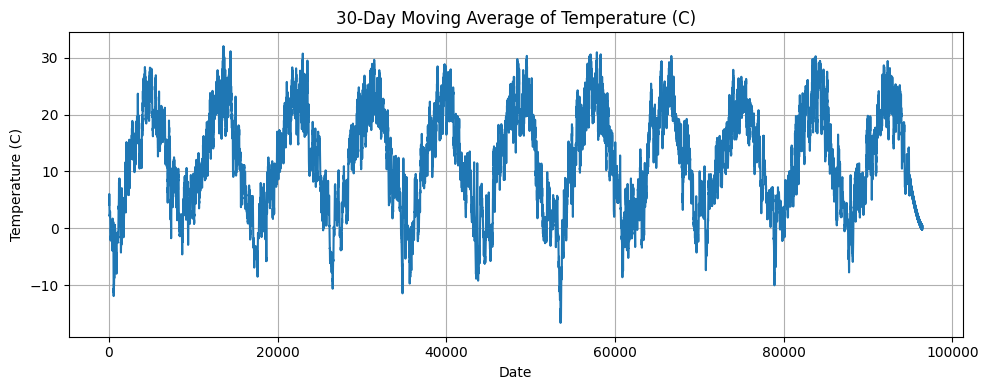

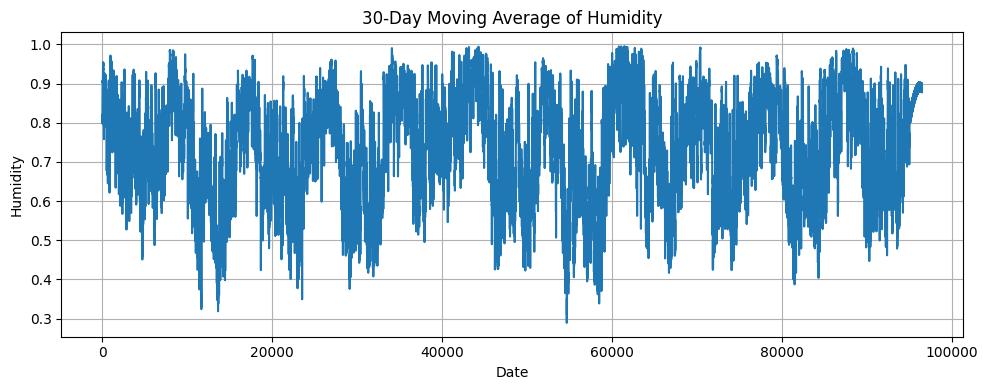

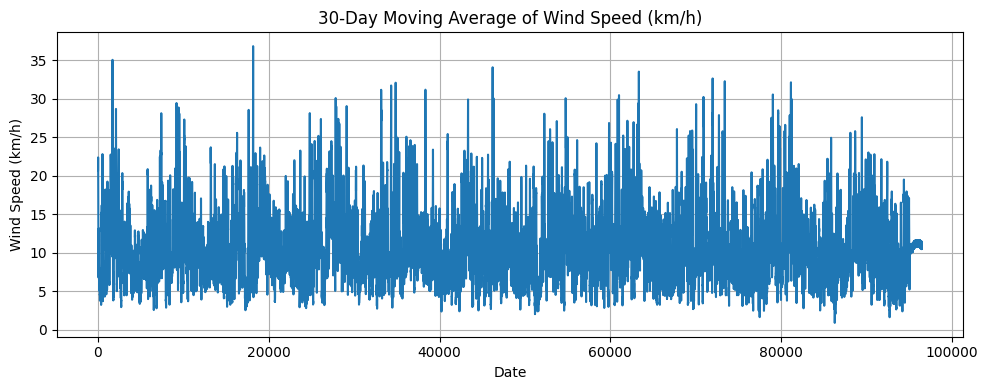

In [36]:
import matplotlib.pyplot as plt

# Filter only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Plot each column separately
for column in numeric_df.columns:
    plt.figure(figsize=(10, 4))
    numeric_df[column].rolling(window=30).mean().plot()
    plt.title(f'30-Day Moving Average of {column}')
    plt.ylabel(column)
    plt.xlabel('Date')
    plt.grid(True)
    plt.tight_layout()
    plt.show()






In [37]:
print(df['Formatted Date'].dtype)


object


In [38]:
# Convert 'Formatted Date' to datetime if it's not already
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], errors='coerce')


C:\Users\SreeKeerthiReddyThat\AppData\Local\Temp\ipykernel_6736\2275459860.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], errors='coerce')


In [39]:
import numpy as np
from statsmodels.tsa.api import VAR
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [40]:
data = df[['Temperature (C)', 'Humidity', 'Wind Speed (km/h)']]
data = data.asfreq('H')
data = data.fillna(method='ffill')

C:\Users\SreeKeerthiReddyThat\AppData\Local\Temp\ipykernel_6736\3172178241.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data = data.asfreq('H')
C:\Users\SreeKeerthiReddyThat\AppData\Local\Temp\ipykernel_6736\3172178241.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')


In [41]:
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)
df.sort_values(by='Formatted Date', ascending=True, inplace=True)
df.set_index('Formatted Date', inplace=True)

C:\Users\SreeKeerthiReddyThat\AppData\Local\Temp\ipykernel_6736\2084708479.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)
C:\Users\SreeKeerthiReddyThat\AppData\Local\Temp\ipykernel_6736\2084708479.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by='Formatted Date', ascending=True, inplace=True)


In [42]:

# Optional: Scale the data (helps with VAR stability)
# ---------- Step 2: Scaling ----------
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns, index=df.index)

In [43]:
# ---------- Step 3: Split ----------
n_obs = 48 
train = scaled_df[:-n_obs]
test = scaled_df[-n_obs:]

In [44]:
# Fit the VAR model
model = VAR(scaled_data)
results = model.fit(maxlags=15, ic='aic')  # auto lag selection using AIC

In [45]:

# ---------- Step 4: Forecasting from today to end of year ----------
today = pd.to_datetime(datetime.today().strftime('%Y-%m-%d'))
end_of_year = pd.to_datetime(f"{today.year}-12-31")
n_future = int((end_of_year - today).total_seconds() // 3600) 

In [46]:
# Get lag order and last data points for forecasting
lag_order = results.k_ar
future_input = scaled_df.values[-lag_order:]
forecast_future_scaled = results.forecast(y=future_input, steps=n_future)
forecast_future = scaler.inverse_transform(forecast_future_scaled)

In [47]:

# Creating a new time index for future predictions
future_index = pd.date_range(start=today, periods=n_future, freq='H')
future_df = pd.DataFrame(forecast_future, columns=df.columns, index=future_index)

C:\Users\SreeKeerthiReddyThat\AppData\Local\Temp\ipykernel_6736\312100932.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  future_index = pd.date_range(start=today, periods=n_future, freq='H')


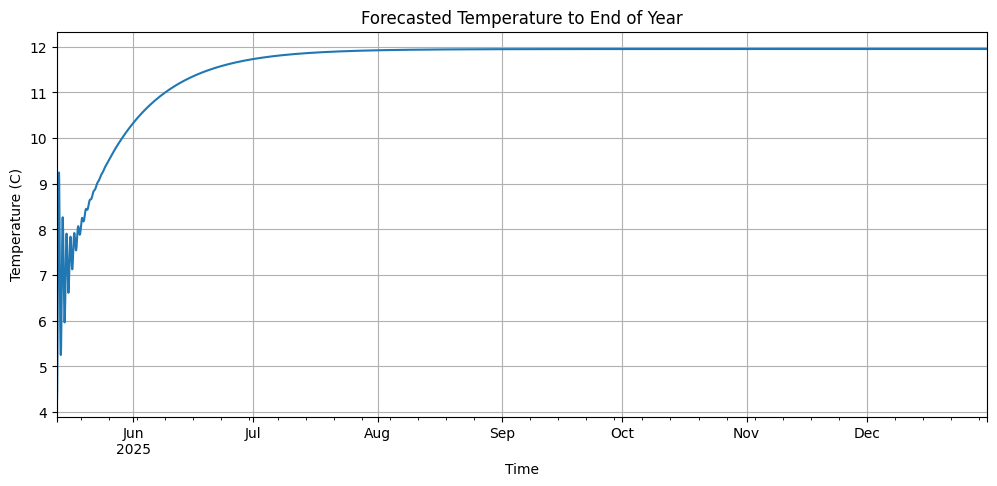

In [48]:
# Optional: Plot one variable
future_df['Temperature (C)'].plot(title='Forecasted Temperature to End of Year', figsize=(12, 5))
plt.ylabel('Temperature (C)')
plt.xlabel('Time')
plt.grid()
plt.show()

In [49]:

# Final result
future_df.to_csv("forecast_from_today_to_end_of_year.csv")


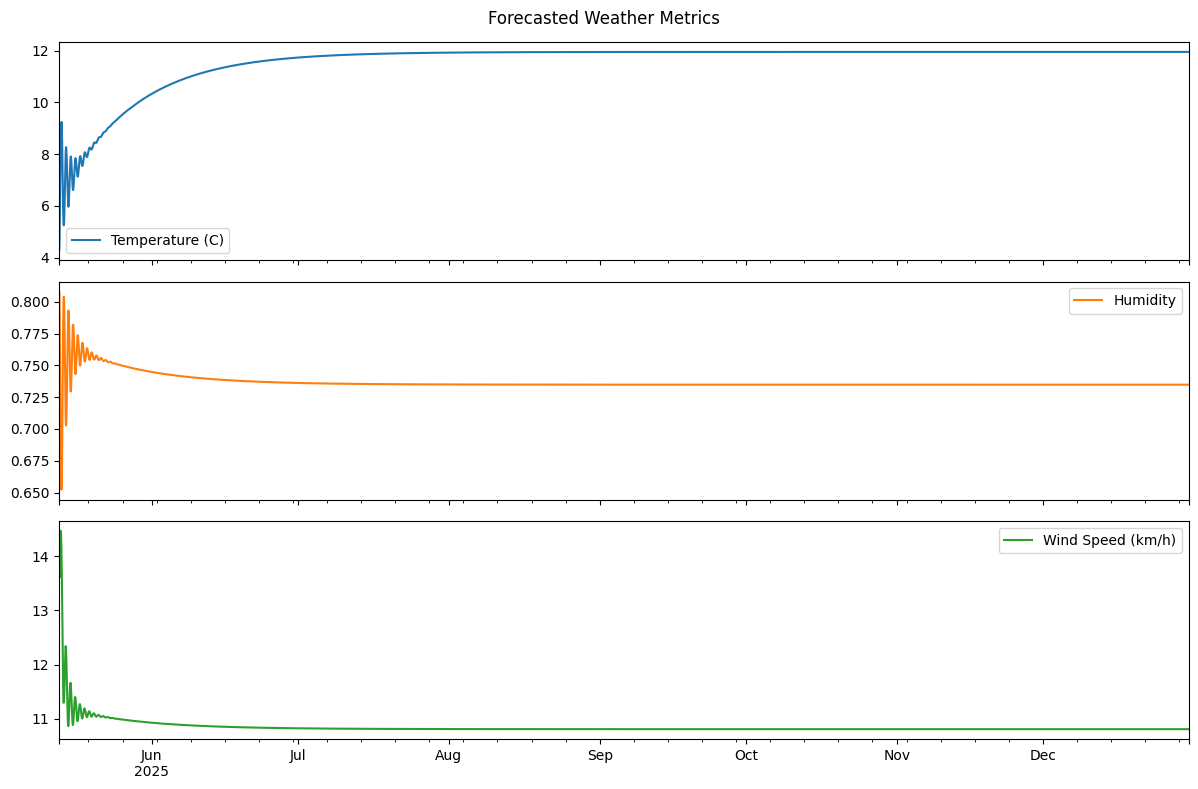

In [50]:

# 4. (Optional) Plot forecast
future_df.plot(subplots=True, figsize=(12, 8), title='Forecasted Weather Metrics')
plt.tight_layout()
plt.show()

In [51]:
forecast = results.forecast(y=scaled_df.values[-lag_order:], steps=len(test))
actual = test.values

In [52]:
# Select forecast values for the test period (48 hours)
forecast_test = forecast[:len(test)]

# Select actual values for the test period (48 hours)
actual_test = actual[:len(test)]


In [53]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate(true, pred, label):
    mae = mean_absolute_error(true, pred)
    rmse = np.sqrt(mean_squared_error(true, pred))
    mape = np.mean(np.abs((true - pred) / true)) * 100
    r2 = r2_score(true, pred)  # Calculating R² score
    print(f"\n{label} Metrics:\nMAE: {mae:.2f} | RMSE: {rmse:.2f} | MAPE: {mape:.2f}% | R²: {r2:.2f}")

for col in data.columns:
    evaluate(actual_test[:, data.columns.get_loc(col)], forecast_test[:, data.columns.get_loc(col)], col)



Temperature (C) Metrics:
MAE: 0.23 | RMSE: 0.30 | MAPE: 231.05% | R²: 0.35

Humidity Metrics:
MAE: 0.38 | RMSE: 0.45 | MAPE: 108.18% | R²: 0.42

Wind Speed (km/h) Metrics:
MAE: 0.88 | RMSE: 1.00 | MAPE: 117.98% | R²: -0.35
